# PSTH Analysis with digitalin.dat Loading

## File Structure:
- `digitalin.dat` - Binary digital input file with TTL events
- `spikes.csv` - Spike times (same as before)
- Channel 0: Pico intervals
- Channel 1: Time markers

In [ ]:
# Import required modules
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import sys
sys.path.append('../..')

# Import custom modules
from digitalin_loader import load_digitalin_intervals, validate_intervals_compatibility
from psth_digitalin_analysis import run_psth_analysis_digitalin

# Reload the digitalin analysis module
if 'psth_digitalin_analysis' in sys.modules:
    importlib.reload(sys.modules['psth_digitalin_analysis'])
if 'digitalin_loader' in sys.modules:
    importlib.reload(sys.modules['digitalin_loader'])

In [8]:
# Configuration - Update these paths to match your data location
data_folder = "../../../Data/040425"  # Adjust this path as needed
digitalin_file = os.path.join(data_folder, "digitalin.dat")
spikes_file = os.path.join(data_folder, "spikes.csv")

# Alternative path for Windows (from your example)
# digitalin_file = r"C:\Users\wanglab\Desktop\Club Like Endings\040425_1\digitalin.dat"

# Recording parameters
sampling_rate = 30000  # Hz - adjust if different
pico_channel = 0      # Channel for pico intervals
time_channel = 1      # Channel for time markers


In [9]:
# PSTH Analysis Parameters - TEST SINGLE UNIT
units = [1]                    # Test with just Unit 1 first
duration = 25                  # Interval duration in ms (25ms, 10ms, 5ms)
bin_size_ms = 1.0              # Bin size in milliseconds
start_time = None              # Start time for filtering in seconds (optional)
end_time = None                # End time for filtering in seconds (optional)
max_trials = None               
pre_interval_ms = 5            # Milliseconds before interval to include
post_interval_ms = 10          # Milliseconds after interval to include
smooth_window = 3              # Number of bins for smoothing (None for no smoothing)
trial_ranges = None            # Specific trial ranges (None for all/max_trials)
save_plots = False             # Whether to save plots to file
output_path = "../../Output/Test_digitalin"  # Directory to save plots


==================== Processing Unit 1 ====================
PSTH & RASTER ANALYSIS (with digitalin.dat support)
Unit: 1
Duration: 25ms
Bin size: 1.0ms
Data source: digitalin.dat
Sampling rate: 30000 Hz
Pre-interval: 5ms
Post-interval: 10ms
Smoothing window: 3 bins
------------------------------------------------------------
Loading spike data from: /home/wanglab/spike-analysis/Data/040425/spikes.csv
Loading interval data from digitalin.dat: ../../../Data/040425/digitalin.dat
DIGITALIN.DAT INTERVAL LOADER
Loading digital input data from: ../../../Data/040425/digitalin.dat
Number of samples: 27277056
Loaded 27277056 samples at 30000 Hz
Recording duration: 909.24 seconds

Extracting TTL events from channel 0
Total High TTL Values:  8907480
Total Low TTL Values:  18369576
Events are likely to be on low to high transition
The TTL duration appears to be 300.0 samples
Found 28336 TTL events on channel 0
Event durations: 10.48 ± 7.19 ms
First 5 events:
  Event 1: 244.912833s - 244.937800s (24

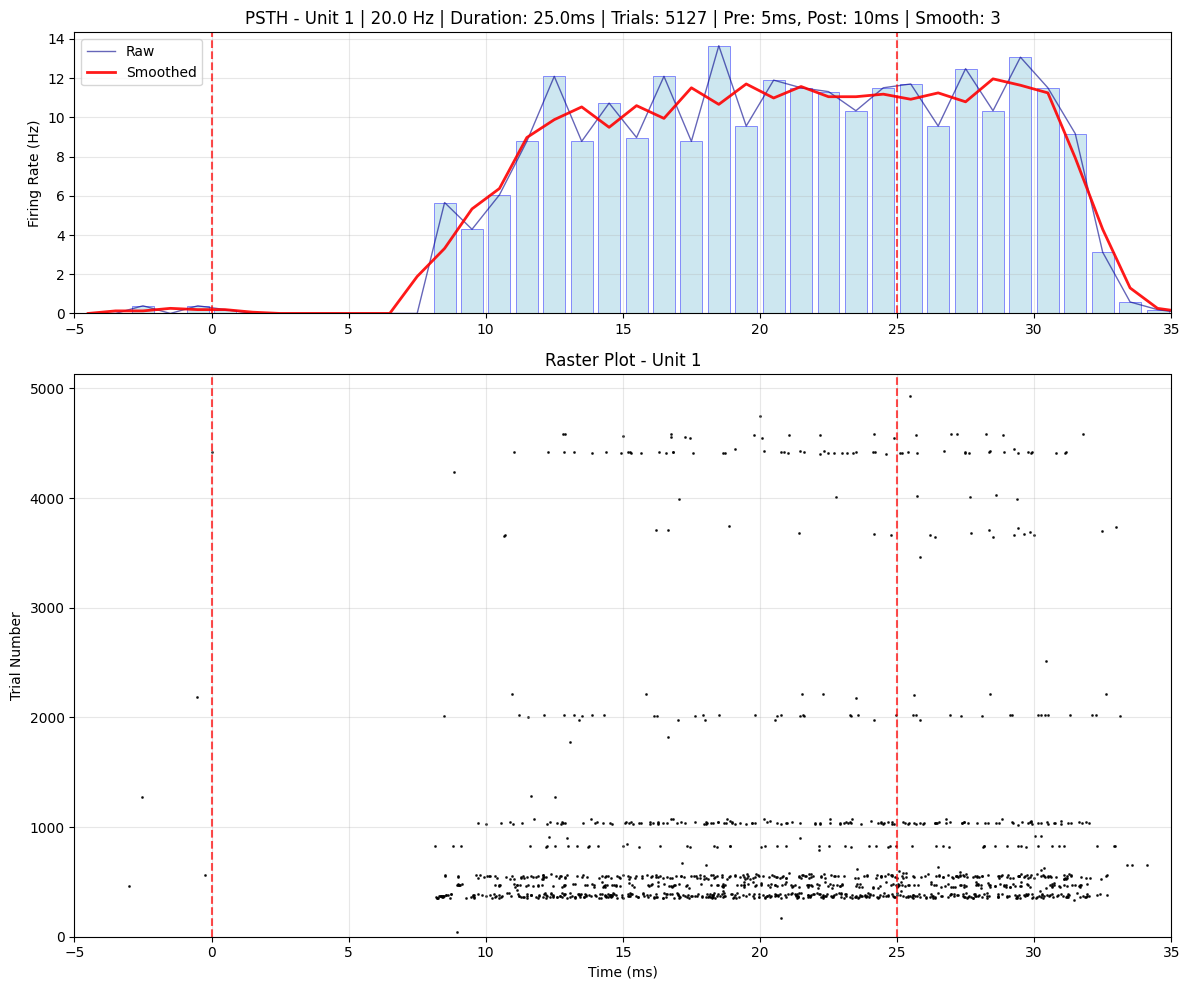

In [10]:
# Run PSTH analysis with digitalin.dat
results = run_psth_analysis_digitalin(
            unit=units,  # Can be single unit or list
            duration=duration,
            bin_size_ms=bin_size_ms,
            start_time=start_time,
            end_time=end_time,
            max_trials=max_trials,
            pre_interval_ms=pre_interval_ms,
            post_interval_ms=post_interval_ms,
            smooth_window=smooth_window,
            trial_ranges=trial_ranges,
            spikes_file=spikes_file,
            digitalin_file=digitalin_file,
            sampling_rate=sampling_rate,
            use_digitalin=True, 
            save=save_plots,
            output_path=output_path
        )

# Display all plots (optional when saving)
if results:
    for i, (fig, axes) in enumerate(results):
        if fig:
            print(f"\n--- Unit {units[i]} ---")
            if not save_plots:  # Only show plots if not saving (to avoid cluttering)
                plt.show()
        else:
            print(f"No data found for Unit {units[i]}!")
else:
    print("No results generated!")

In [10]:
# Test loading digitalin.dat file
if os.path.exists(digitalin_file):
    print("Loading digitalin.dat file...")
    
    try:
        intervals_df = load_digitalin_intervals(
            digitalin_filepath=digitalin_file,
            sampling_rate=sampling_rate,
            pico_channel=pico_channel,
            time_channel=time_channel
        )
        
        print(f"\nSuccessfully loaded {len(intervals_df)} intervals!")
        print("\nFirst few intervals:")
        print(intervals_df.head())
        
        # Validate compatibility
        is_valid = validate_intervals_compatibility(intervals_df)
        print(f"\nCompatibility check: {'✓ PASSED' if is_valid else '✗ FAILED'}")
        
    except Exception as e:
        print(f"Error loading digitalin.dat: {e}")
        intervals_df = None
        
else:
    print("digitalin.dat file not found! Please check the file path.")
    intervals_df = None

Loading digitalin.dat file...
DIGITALIN.DAT INTERVAL LOADER
Loading digital input data from: ../../Data/040425/digitalin.dat
Number of samples: 27277056
Loaded 27277056 samples at 30000 Hz
Recording duration: 909.24 seconds

Extracting TTL events from channel 0
Total High TTL Values:  8907480
Total Low TTL Values:  18369576
Events are likely to be on low to high transition
Total High TTL Values:  8907480
Total Low TTL Values:  18369576
Events are likely to be on low to high transition
The TTL duration appears to be 300.0 samples
Found 28336 TTL events on channel 0
Event durations: 10.48 ± 7.19 ms
First 5 events:
  Event 1: 244.912833s - 244.937800s (24.97ms)
  Event 2: 244.962833s - 244.987800s (24.97ms)
  Event 3: 245.012833s - 245.037833s (25.00ms)
  Event 4: 245.062833s - 245.087833s (25.00ms)
  Event 5: 245.112833s - 245.137833s (25.00ms)

Extracting TTL events from channel 1
Total High TTL Values:  25811067
Total Low TTL Values:  1465989
Events are most likely to be on high to low